In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dense, Dropout
#Load the dataset
df = pd.read_csv('iduki dam.csv')
df=df[:6818]
# Save the updated DataFrame back to the original CSV file (overwrite the existing data)
df.to_csv('iduki dam.csv', index=False)
# Train-Test Split
train_data = df[df['DATE'] <= '2018-08-08']  # Train data up to May 31, 2023
test_data = df[df['DATE'].between('2018-08-09', '2018-08-18')]  # Test data from June 1 to July 10, 202
# Preprocess data and split into features and target
X_train = train_data.drop(columns=['DATE', 'PRECTOTCORR'])
y_train = train_data['PRECTOTCORR']
X_test = test_data.drop(columns=['DATE', 'PRECTOTCORR'])
y_test_actual = test_data['PRECTOTCORR']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
train_data

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,QV2M,RH2M,PRECTOTCORR,DATE
0,93.19,1.50,2.35,0.95,1.40,78.75,3.16,4.24,2.42,1.82,77.06,11.96,78.06,0.01,2000-01-01
1,93.19,1.38,2.30,0.26,2.05,71.12,2.66,4.07,0.55,3.51,71.50,11.29,75.44,0.00,2000-01-02
2,93.13,0.94,1.73,0.19,1.54,109.75,1.84,3.41,0.27,3.15,104.81,12.33,78.94,0.00,2000-01-03
3,93.12,1.05,1.93,0.36,1.57,63.88,2.35,3.52,1.10,2.41,64.19,13.18,83.31,0.00,2000-01-04
4,93.09,1.27,1.98,0.88,1.10,67.81,2.59,3.53,1.98,1.55,67.94,13.43,81.56,0.00,2000-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6790,93.31,2.02,3.36,0.45,2.90,290.94,3.93,5.55,1.65,3.91,291.00,15.56,92.44,2.96,2018-08-04
6791,93.31,2.80,4.18,2.02,2.16,285.38,5.24,6.94,4.33,2.61,286.50,16.30,92.31,3.14,2018-08-05
6792,93.23,3.29,4.52,2.38,2.14,277.81,6.11,7.58,5.05,2.52,278.88,16.11,92.38,3.58,2018-08-06
6793,93.10,3.29,4.47,2.40,2.07,274.06,6.12,7.64,5.08,2.57,275.12,16.17,92.31,10.92,2018-08-07


In [101]:
test_data

,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,QV2M,RH2M,PRECTOTCORR,DATE
6795,93.25,2.87,4.05,1.92,2.13,282.31,5.38,6.85,4.16,2.69,283.56,15.87,93.19,22.69,2018-08-09
6796,93.36,2.75,3.52,2.03,1.48,287.06,5.23,5.97,4.37,1.60,288.25,16.36,94.12,14.74,2018-08-10
6797,93.28,3.01,4.16,1.96,2.20,294.56,5.66,7.09,4.25,2.84,295.44,16.30,93.75,3.31,2018-08-11
6798,93.20,3.09,4.25,1.50,2.75,289.94,5.77,7.30,3.36,3.95,290.25,15.56,94.44,11.35,2018-08-12
6799,93.19,3.15,4.61,2.41,2.20,278.69,6.07,8.09,4.97,3.11,279.69,16.24,93.62,10.99,2018-08-13
6800,93.16,4.15,5.06,3.34,1.73,270.50,7.59,8.86,6.54,2.33,271.75,16.11,92.62,22.32,2018-08-14
6801,93.12,4.40,5.16,3.82,1.34,265.62,7.88,8.81,7.05,1.77,266.69,16.54,94.25,63.19,2018-08-15
6802,93.11,4.33,4.98,3.79,1.20,270.69,7.82,8.66,7.20,1.45,271.94,16.36,95.38,54.28,2018-08-16
6803,93.03,4.16,5.22,3.23,2.00,278.38,7.59,9.08,6.41,2.66,280.06,16.91,94.31,26.33,2018-08-17
6804,93.08,3.55,4.04,2.93,1.11,274.88,6.54,7.30,5.65,1.65,276.38,15.87,95.06,9.77,2018-08-18


In [102]:
from tensorflow.keras.callbacks import EarlyStopping

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Create the LSTM model with dropout layers
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))  # Adding dropout layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model without early stopping
history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on test data
lstm_predictions = model.predict(X_test_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual, lstm_predictions))
lstm_mse = mean_squared_error(y_test_actual, lstm_predictions)
lstm_r_squared = r2_score(y_test_actual, lstm_predictions)

# Print RMSE, MSE, and R-squared
print("LSTM RMSE:", lstm_rmse)
print("LSTM MSE:", lstm_mse)
print("LSTM R-squared:", lstm_r_squared)


In [ ]:
# Train XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.2, random_state=0)
xgb_regressor.fit(X_train_scaled, y_train)
xgb_predictions = xgb_regressor.predict(X_test_scaled)
xgb_rmse = np.sqrt(mean_squared_error(y_test_actual, xgb_predictions))
xgb_mse = mean_squared_error(y_test_actual, xgb_predictions)
xgb_accuracy = 100 * (1 - (np.sqrt(mean_squared_error(y_test_actual, xgb_predictions)) / (max(y_test_actual) - min(y_test_actual))))
print("XGBoost Accuracy:", xgb_accuracy, "%")
print("XGBoost RMSE:", xgb_rmse)
print("XGBoost MSE:", xgb_mse)
xgb_r=r2_score(y_test_actual,xgb_predictions)
print("R Squared:",xgb_r)


XGBoost Accuracy: 67.3189131152608 %
XGBoost RMSE: 19.569434826581833
XGBoost MSE: 382.9627794318339
R Squared: -0.09162340844853412


In [ ]:
# Train Support Vector Machine (SVM) Regressor

svm_regressor = SVR(C=10, gamma='scale', kernel='rbf')
svm_regressor.fit(X_train_scaled, y_train)
svm_predictions = svm_regressor.predict(X_test_scaled)
svm_rmse = np.sqrt(mean_squared_error(y_test_actual, svm_predictions))
svm_mse = mean_squared_error(y_test_actual, svm_predictions)
svm_accuracy = 100 * (1 - (np.sqrt(mean_squared_error(y_test_actual, svm_predictions)) / (max(y_test_actual) - min(y_test_actual))))
print("SVM Accuracy:", svm_accuracy, "%")
print("SVM RMSE:", svm_rmse)
print("SVM MSE:", svm_mse)
svm_r=r2_score(y_test_actual,svm_predictions)
print("R Squared:",svm_r)

SVM Accuracy: 70.25623872368503 %
SVM RMSE: 17.810564252257404
SVM MSE: 317.21619898378935
R Squared: 0.09578515994813708


In [ ]:
# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=150, random_state=32)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test_actual, rf_predictions))
rf_mse = mean_squared_error(y_test_actual, rf_predictions)
rf_accuracy = 100 * (1 - (np.sqrt(mean_squared_error(y_test_actual, rf_predictions)) / (max(y_test_actual) - min(y_test_actual))))
print("Random Forest Accuracy:", rf_accuracy, "%")
print("Random Forest RMSE:", rf_rmse)
print("Random Forest MSE:", rf_mse)
rf_r=r2_score(y_test_actual,rf_predictions)
print("R Squared:",rf_r)

Random Forest Accuracy: 77.34088144081784 %
Random Forest RMSE: 13.568280193238284
Random Forest MSE: 184.09822740222234
R Squared: 0.47523376871167045


In [ ]:
# Combine the predictions using an ensemble approach (simple averaging)
ensemble_predictions = (xgb_predictions + rf_predictions + svm_predictions + lstm_predictions.flatten()) / 4
# Calculate RMSE, MSE, and R-squared for ensemble predictions on test data
ensemble_rmse = np.sqrt(mean_squared_error(y_test_actual, ensemble_predictions))
ensemble_mse = mean_squared_error(y_test_actual, ensemble_predictions)
ensemble_r_squared = r2_score(y_test_actual, ensemble_predictions)
# Print Ensemble RMSE, MSE, and R-squared on test data
print("Ensemble RMSE (Test):", ensemble_rmse)
print("Ensemble MSE (Test):", ensemble_mse)
print("Ensemble R-squared (Test):", ensemble_r_squared)

Ensemble RMSE (Test): 14.471207219636089
Ensemble MSE (Test): 209.41583839364768
Ensemble R-squared (Test): 0.40306671152340623


In [ ]:
precp=[xgb_mse,rf_mse,svm_mse,lstm_mse,ensemble_mse]
a=min(precp)
print(a)
if(precp[0]==a):
    best=(xgb_predictions)
    print('xgb')
elif(precp[1]==a):
    best=(rf_predictions)
    print('rf')
elif(precp[2]==a):
    best=(svm_predictions)
    print('svm')
elif(precp[3]==a):
    best=(lstm_predictions).flatten()
    print('lstm')
else:
    best=(ensemble_predictions)
    print('ensemble')
print(best)

181.74529420319982
lstm
[ 9.4730215  8.437855   8.754184  11.6460705 15.430757  25.425257
 35.136265  39.12215   27.785086  32.68436  ]


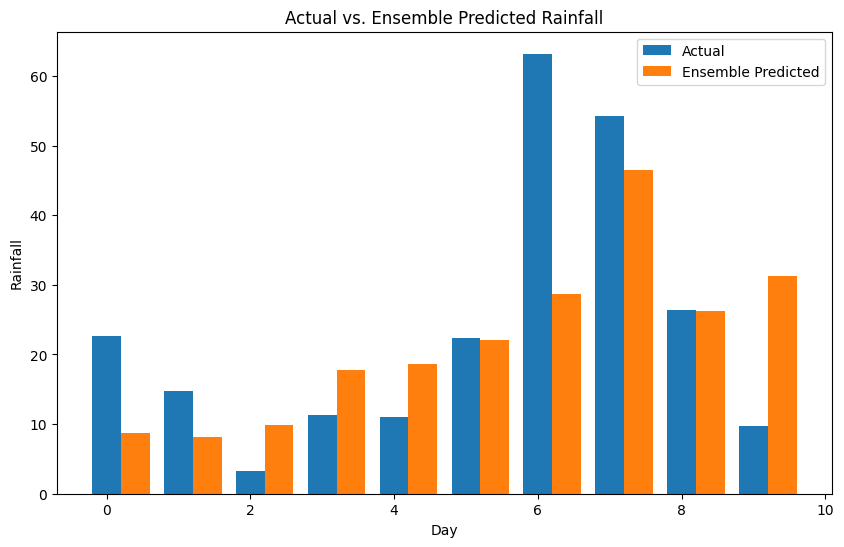

In [ ]:
import matplotlib.pyplot as plt
results_df = pd.DataFrame({'Actual': y_test_actual, 'Ensemble_Predicted': ensemble_predictions})
results_df = results_df.reset_index(drop=True)  # Reset the index
# Plot a bar graph
days = results_df.index
plt.figure(figsize=(10, 6))
plt.bar(days, results_df['Actual'], width=0.4, label='Actual')
plt.bar(days + 0.4, results_df['Ensemble_Predicted'], width=0.4, label='Ensemble Predicted')
plt.xlabel('Day')
plt.ylabel('Rainfall')
plt.title('Actual vs. Ensemble Predicted Rainfall')
plt.legend()
plt.show()

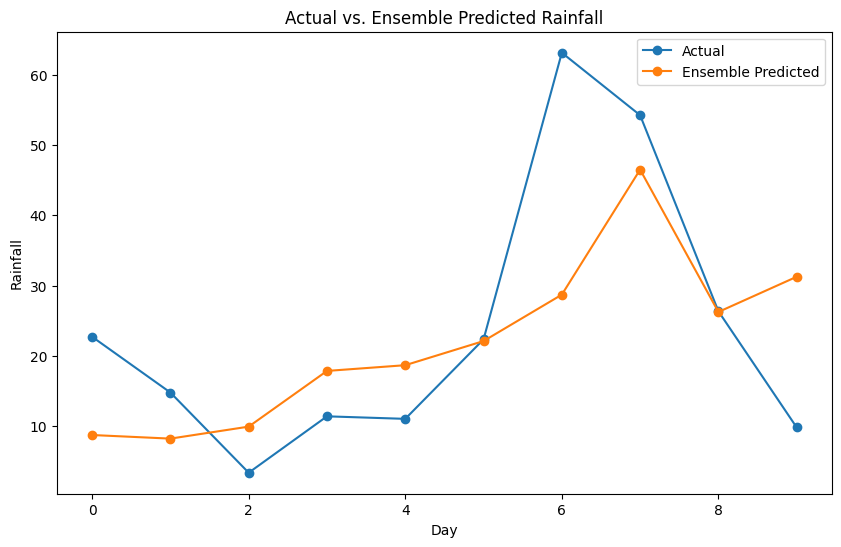

In [ ]:
days = results_df.index
plt.figure(figsize=(10, 6))
plt.plot(days, results_df['Actual'], label='Actual', marker='o')
plt.plot(days, results_df['Ensemble_Predicted'], label='Ensemble Predicted', marker='o')
plt.xlabel('Day')
plt.ylabel('Rainfall')
plt.title('Actual vs. Ensemble Predicted Rainfall')
plt.legend()
plt.show()

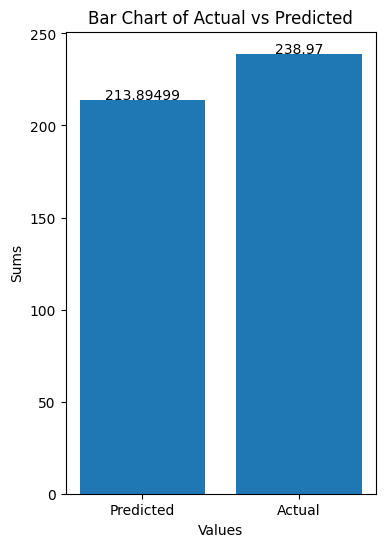

In [ ]:
import matplotlib.pyplot as plt

# Values
mx = best.sum()
my = y_test_actual.sum()

# Labels
labels = ['Predicted', 'Actual']
values = [mx, my]

# Create bar chart with adjusted plot size
plt.figure(figsize=(4, 6))  # Adjust the width and height as needed

plt.bar(labels, values)
plt.xlabel('Values')
plt.ylabel('Sums')
plt.title('Bar Chart of Actual vs Predicted')

# Label the bars with their values
for i, v in enumerate(values):
    plt.text(i, v + 0.1, str(v), ha='center')
plt.show()


In [ ]:
best.sum()

213.89499

In [ ]:
y_test_actual.sum()

238.97